# Introduction to Machine Learning (CSCI-UA.473)

### Homework 5


#### Name: Gil Halevi
#### Email: gh2354@nyu.edu

### Question 1: Dimensionality Reduction (100 points)

**Task 1.1 (5 points).** What is the significance of eigen values and eigen vectors of a covariance matrix of the data in computing its principal components? How does the PCA algorithm handle cases where the covariance matrix is singular or nearly singular?

The eigenvectors are the directions in the data with the highest variance. The eigenvalues are the variance in those directions. If a matrix is singular or nearly singular, PCA will be able to have close to lossless compression with fewer than the amount of factors originally in the data

**Task 1.2 (5 points).** How does one quantitatively determine the optimal number of principal components to retain in order to preserve a significant amount of variance?

One can do this by cross-validation, trying a different number of principal components and seeing how the model performs on the validation set

Given the following input data consisting of 5 examples each of dimension 3:

$$
\begin{bmatrix}
1 & 1 & 9 \\
2 & 4 & 6 \\
3 & 7 & 4 \\
4 & 11 & 4 \\
5 & 9 & 2
\end{bmatrix}
$$


**Task 1.3 (10 points)** Identify first two principal components.

**Task 1.4 (10 points)** Find the transformed input along the first two principal components.

In [1]:
import numpy as np

A = np.array([[1,1,9],[2,4,6],[3,7,4],[4,11,4],[5,9,2]])
covariance = A @ A.T
u, s, v_t = np.linalg.svd(A)
print(A.shape)
print(s.shape)
print(u.shape)
print(v_t.shape)
pc_1, pc_2 = u[:,0],u[:,1]
print("principal component 1:", pc_1)
print("principal component 2:", pc_2)
transformed_input = np.stack([pc_1,pc_2], axis=0) @ A
print("transformed input:", transformed_input)

(5, 3)
(3,)
(5, 5)
(3, 3)
principal component 1: [-0.27805952 -0.34247889 -0.43135129 -0.60902787 -0.4984097 ]
principal component 2: [-0.82365624 -0.34928428  0.02569414  0.25453828  0.36625259]
transformed input: [[ -7.18523116 -15.85242801  -9.71574505]
 [  1.40427368   4.05526     -7.65517701]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive


drive.mount('/content/drive/')
## Use the same dataset that was released with HW1
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hw1_dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mounted at /content/drive/


**Task 1.5 (10 points)** Implement PCA (from scratch) for the above dataset.

**Task 1.6 (10 points**) Plot the explained variance ratio for the principal components. How many components would you choose to keep and why?

<Axes: title={'center': 'explained variance of the first 3 principle components'}>

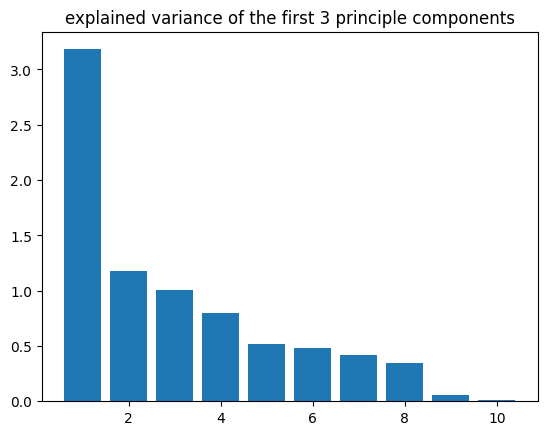

In [ ]:
## Add code here
from matplotlib import pyplot as plt

u, s, v_t = np.linalg.svd(X_train)
principal_components=v_t.T
explained_variances = np.square(s)
fig, ax = plt.subplots()
ax.bar(x=range(1,11),height=explained_variances)
ax.set_title("explained variance of the first 3 principle components")
fig.show()
sns.scatterplot()

I would keep 8 components. There is a stark dropoff in the amount of variance explained once you get to the 9th component, so the last 2 components are not very useful and can be removed

**Task 1.7 (10 points).** Apply t-SNE to the above dataset and visualize the results. You can use existing libraries.

**Task 1.8 (10 points).** Articulate one difference between how the two algorithms (PCA and t-SNE) map the data into low-dimensional space.

Text(0.5, 1.0, 'representation of data. The color corresponds to the value of target')

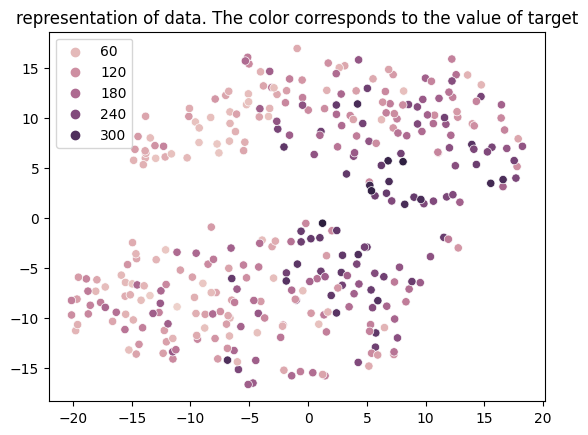

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
## Add code here
tsne_model = TSNE()
embeddings = tsne_model.fit_transform(X_train)
ax=sns.scatterplot(x=embeddings[:,0], y=embeddings[:,1], hue=y_train)
ax.set_title("Representation of data. The color corresponds to the value of target")

PCA is better for representing the global information of the data (the general directions that carry most of the variance) while TSNE is better for representing the local information of the data (clusters)

**Task 1.9 (20 points).** First, perform KNN classification in the feature space comprised of the first 3 principal components. Then perform KNN classification on the full feature space. Report and compare their accuracy on the test set. For the KNN classifier, you can use your implementation from the past homework or any existing libraries.

**Task 1.10 (10 points).** Plot a comparison in the accuracy, where x-axis denotes the different numbers of principal components and y-axis denotes the the test accuracy with the accuracy of K-means on the full dataset.

KNN performed on PCA embedded data: 0.6966292134831461
KNN performed on raw data: 0.7191011235955056


Text(0, 0.5, 'accuracy')

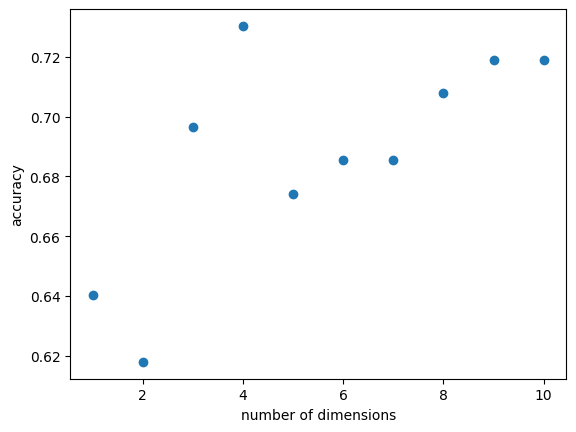

In [ ]:
## Add code here
from sklearn.neighbors import KNeighborsClassifier
y_train_binary = y_train > np.average(y_train)
y_test_binary = y_test > np.average(y_test)
# print(principal_components.shape)
# print(X_train.shape)
knn_pca = KNeighborsClassifier().fit(X_train.to_numpy() @ principal_components[:,:3], y_train_binary)
knn_full = KNeighborsClassifier().fit(X_train.to_numpy(), y_train_binary)
print("KNN performed on PCA embedded data:",knn_pca.score(X_test.to_numpy() @ principal_components[:,:3], y_test_binary))
print("KNN performed on raw data:",knn_full.score(X_test.to_numpy(),y_test_binary))
accs = []
for n_comp in range(1,11):
  accs.append(KNeighborsClassifier().fit(X_train.to_numpy() @ principal_components[:,:n_comp], y_train_binary)\
                .score(X_test.to_numpy() @ principal_components[:,:n_comp], y_test_binary))
fig, ax = plt.subplots()
ax.scatter(x=range(1,11),y=accs)
ax.set_xlabel("number of dimensions")
ax.set_ylabel("accuracy")
# KNeighborsClassifier


The KNN performed 2% better when trained on the raw data